# Ingeniería de la confiabilidad

La confiabilidad es un aspecto de la calidad que representa la estabilidad a lo largo del tiempo, y la ingeniería de confiabilidad es la tecnología (ingeniería) relacionada con la confiabilidad de sistemas y elementos.


In [173]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()

In [174]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from IPython.display import display
from PIL import Image


## 11-01 Ingeniería de la confiabilidad

### 1. Ingeniería de la confiabilidad
 La **confiabilidad** se define como la capacidad de un artículo para desempeñar su función durante un período determinado sin fallar, bajo condiciones específicas.

La confiabilidad es una faceta de la calidad que representa la propiedad de **estabilidad a lo largo del tiempo**.
Lo importante de la definición anterior es dejar claro: 1. qué es un **articulo**, 2. qué son las **condiciones dadas**, 3. qué es el **tiempo dado**, 4. qué es la **falla**.

 La **confiabilida** $ R $ se refiere a la probabilidad de que un artículo realice su función correctamente durante el intervalo de tiempo $ (t_1, t_2) $, bajo condiciones dadas, y se expresa como $ R = 1-F $ (donde F es la no confiabilidad)

 * Confiabilidad de un **sistema en serie**

 $ R = R_1 \times R_2 \times ... \times R_n $

 * Confiabilidad de un **sistema en paralelo**

 $ R = 1 - (1 - R_1) \times (1-R_2) \times ... \times (1 - R_n) $

 1. Un **artículo** es el objeto de estudio.
 Por ejemplo, un sistema, un producto, un componente o un material.
 Es necesario definir claramente el objeto que se va a tratar.
 2. Las **condiciones dadas** se refieren a l entorno de uso (temperatura, humedad, vibración, etc.) y la forma de uso.
 No se incluyen entornos de uso anormales ni usos incorrectos.
 3. El **periodo de tiempo dado** se refiere al tiempo o algo equivalente al tiempo, como el número de operaciones o el número de ciclos.
 4. Una **falla** es el estado en el que no se puede llevar a cabo el efecto o la función esperada.


## 11.1

信頼度が80%のA部品を三つ用いて直列に結合した時の信頼度を求めよ。また、A部品を用いて、システムの信頼度を99%以上にするためには、少なくと何個の部品を用いて並列系を構成する必要があるかを求めよ。

Determina la confiabilidad cuando tres componentes A, cada uno con una confiabilidad del 80%, se conectan en serie. Además, calcula cuántos componentes A se necesitan en paralelo para que la confiabilidad del sistema sea de al menos del 99%.


In [175]:
# Confiabilidad cuando tres componentes A con una confiabilidad del 80% están conectado en serie.

def series_reliability(r, n):
    return r ** n

# Determinar el número mínimo de componentes A con una confiabilidad 80% conectados
# en paralelo para lograr una confiabilidad del sistema de al menos el 99%

def required_parallel_units(r, target):
    n = 1
    while 1 - (1 - r) ** n < target:
        n += 1
    return n

# Confiabilidad del componente A
r_A = 0.8

# Confiabilidad en conexión en serie
series_r = series_reliability(r_A, 3)
print(f"Confiabilidad cuando tres componentes A están conectados en serie: {series_r:.4f}")

# Número mínimo de componentes en conecxión en paralelo para alcanzar al menos un 99% de confiabilidad
min_parallel_units = required_parallel_units(r_A, 0.99)
print(f"Número mínimo de componentes A necesarios para que la confiabilidad del sistema sea de la menos el 99%: {min_parallel_units}")

Confiabilidad cuando tres componentes A están conectados en serie: 0.5120
Número mínimo de componentes A necesarios para que la confiabilidad del sistema sea de la menos el 99%: 3


Las actividades de confiabilidad son una serie de acciones para mejorar la confiabilidad, que incluyen comprender la confiabilidad actual, determinar la confiabilidad objetivo, incorporar medidas para lograrla durante la fase de desarrollo, y analizar las causas y prevenir fallas cunado ocurran.

1. Actividades para identificar desafíos de mejora en las etapas de planificación y diseño con el fin de evitar problemas.

2. Actividades que tienen como objetivo esclarecer la realidad de una falla, desencadenadas por el descubrimiento de un problema o la aparición de signos potenciales de que uno está a punto de ocurrir.

3. Actividades para comprender el nivel de confiabilidad actual mediante el análisis estadístico de los datos de fallas, la investigación de los resultados de las pruebas de confiabilidad de prototipos y el estudio de las condiciones de uso de los sistemas en el mercado.



### 1. FMEA (Failure Modes and Effects Analysis)

Es un método para analizar los modos de fallo de los componentes y su impacto en los elementos superiores, con el fin de identificar **posibles defectos**.

Es un método **ascendente** (bottom-up) que es efectivo para descubrir problemas potenciales, rastreando de abajo hacia arriba.

En el FMEA, se crea un **diagrama de bloques de confiabilidad**.
Un **diagrama de bloques de confiabilidad** es una representación gráfica de los componentes de un sistema y su confiabilidad.
Se utiliza para examinar cómo la confiabilidad de cada componente afecta al funcionamiento normal o a la falla de todo el sistema.


### 2. FTA (Fault Tree Analysis)

Es un método para analizar los modos de fallo y las probabilidades de su ocurrencia utilizando símbolos lógicos, expandiendo los sucesos en un diagrama de árbol, retrocediendo a lo largo de la secuencia de eventos, y analizando las rutas y causas de ocurrencia.
Es un método descendente (top-down) que es efectivo para investigar las causas de un evento, descomponiéndose de arriba hacia abajo.

La aplicación del FTA se da en dos escenarios: el análisis previo de fallas durante la fase de diseño y el análisis posterior a la falla para determinar la causa raíz de problemas críticos.


### 3. DR (Design Review)

Debido a la complejización de las funciones del producto, depender únicamente de uno o pocos técnicos puede dar lugar a errores, omisiones o fallos relacionados con las nuevas tecnologías.
Este enfoque busca prevenir estos problemas de manera proactiva y mejorar el nivel de diseño del producto mediante la integración de las perspectivas de un grupo más amplio de expertos.

DR es una actividad en la que expertos de diferentes campos revisan, pero se puede esperar que sea aún más efectiva si se utiliza una **lista de verificación*** para evitar omisiónes o inconsistencias.
Sería útil tener listas de verificación que cubran, además de las funciones y el rendimiento, aspectos como la confiabilidad, la seguridad y la ergonomía.

Al realizar DR y predicciones de problemas, es recomendable enfocarse en los puntos nuevos y los cambios.

### 2. Durabilidad, Mantenibilidad y Fiabilidad del deseño

#### (1) Durabilidad:

La durabilidad (confiabilidad en sentido estricto) es la característica de tener pocas fallas o una larga vida útil, en otras palabras, es la **resistencia a romperse**.

Para expresar la **resistencia a la rotura**, es crucial tener en cuenta la escala de tiempo y mostrar la relación enter la falla y el tiempo.

* Robustez

* **Fiabilidad R**: La probabilidad de que algo pueda llevar a cabo la función requerida sin fallar durante un período de tiempo determinado (la probabilidad de funcionar correctamente).

* **MTTF** (Tiempo Medio Hasta Fallo): El tiempo promedio hasta la falla.

* **Vida B10**: El tiempo hasta que el 10% de las unidades fallen (el tiempo en el que la confiabilidad alcanza el 90%)

* **Tasa de fallos** $ \lambda $: La probabilidad de que ocurra una falla por unidad de tiempo.

* **MTBF** (Tiempo Medio Entre Fallos): El tiempo promedio entre fallas (MTBF, por sus siglas en inglés) es el tiempo promedio entre la reparación y la siguiente falla. Es el recíproco de la tasa de fallas.

#### (2) Mantenibilidad:

La **mantenibilidad** es la **facilidad de reparación**.
Se puede clasificar en dos tipos: la facilidad de reparación (**mantenimiento correctivo**) y la supresión de fallas de antemano (**mantenimiento preventivo**).

* **Índice de mantenibilidad** $ R $: La probabilidad de que una reparación se completa en un tiempo $ t $.

* **MTTR** (Tiempo Medio de Reparación: es la medida que representa el tiempo promedio necesario para reparar un componente o sistema después de una falla.

La mantenibilidad es un elemento que complementa la curabilidad para mejorar la confiabilidad de un sistema.
La propiedad que permite un fácil acceso a las partes de un sistema, como los puntos de fallo, para tareas de mantenimiento como inspección y reparación, se conoce como **accesibilidad**.


#### (3) Fiabilidad del diseño:

La fiabilidad del diseño es una fiabilidad que incluye la facilidad de uso y los fallos de funcionamiento, y se vuelve importante cuando se tiene en cuenta a quienes utilizan el producto o sistema.

1. Prevención de errores: Tarea la causa.

2. Sistemas a prueba de fallos: Seguridad después del fallo.

3. Fallo suave (sin daño completo): Manejo de las consecuencias.

4. Fallo suave (progresivo): Prevención de la propagación.


## 11.2

ある部品について、寿命の平均値が1200時間、標準偏差が20時間の正規分布に従うとき、B10ライフを求めよ。

Para un determinado componente cuya vida útil sigue una distribución normal con una media de 1200 horas y una desviación estándar de 20 horas, determina la vida B10.

In [176]:
# Vida útil promedio y desviación estándar
mean_life = 1200
std_dev = 20

# Cálculo de la vida B10 (percentil inferior del 10%)
b10_life = stats.norm.ppf(0.10, loc=mean_life, scale=std_dev)

print(f"Vida B10: {b10_life:.2f} horas")

Vida B10: 1174.37 horas


## 11.3

６台のシステムの故障データは次のとおりであり、寿命分布は指数分布に従うとき、MTBFの点推定値と故障率λを求めよ。653,780,798,854,911,1038（時間）

Los datos de fallos de seis sistemas son los siguientes: 653, 780, 798, 911 y 1038 horas.

Si la distribución de vida sigue una distribución exponencial, determina la estimación puntual del MTBF y la tasa de fallos $ \lambda $.

In [177]:
# Datos de fallos
failure_times = [653, 780, 798, 854, 911, 1038]

# Cálculo del MTBF（Tiempo Medio Entre Fallos）
mtbf = sum(failure_times) / len(failure_times)

# Cálculo de la tasa de fallos λ （λ = 1/MTBF）
failure_rate = 1 / mtbf

print(f"MTBF（Fallos por unidad de tiemp）: {mtbf:.2f} horas")
print(f"Tasa de fallos λ: {failure_rate:.4f} （fallos/horas）")


MTBF（Fallos por unidad de tiemp）: 839.00 horas
Tasa de fallos λ: 0.0012 （fallos/horas）


## 11.4

故障した場合に修理を考える修理系では、耐久性と保全性を同時に考慮し総合的に評価する尺度としてアベイラビリティが用いられる。アベイラビリティを求める式に用いる耐久性の尺度と保全性の尺度について答え、それらの尺度を用いてアベイラビリティの計算式を答えよ。

En los sistemas de reparación donde se considera la reparación en caso de fallos, se utiliza la disponibilidad como un indicador integral que evalúa simultáneamente la durabilidad y la mantenibilidad. Responde sobre las métricas de durabilidad y mantenibilidad que se utilizan en la fórmula para calcular la disponibilidad y proporciona la fórmula de cálculo de la disponibilidad utilizando estas métricas.



La disponibilidad en un sistema de reparación se calcula como la relación entre el tiempo de funcionamiento del sistema (tiempo de actividad) y el tiempo total, cuando se divide en tiempo de actividad y tiempo de inactividad (tiempo de reparación).
* Métrica de durabilidad: MTBF (Tiempo Medio Entre Fallos)
* Métrica de mantenibilidad: MTTR (Tiempo Medio de Reparación)
* Disponibilidad = MTBF / (MTBF + MTTR)


## 11-02 Cómo resumir y analizar los datos de confiabilidad

### 1. Distribución de Weibull

En el análisis de dato de fiabilidad, la distribución de vida que desempeña un papel importante sigue la **distribución de Weibull**.

#### (1) ¿Qué es la distribución de Weibull?

* Función de distribución de la distribución de Weibull: No confiabilidad F(t)

$ F(t) = 1 - exp \big\{ - \bigl( \frac{t -\gamma}{\eta} \bigr)^m \bigr\} $
$ \qquad ( 0 \leq t < \gamma, \gamma \leq t ) $

#### (2) Los tres parámetros de la distribución de Weibull

* Parámetro de ubicación $ \gamma $: es el parámetro que representa el tiempo mínimo en el que puede ocurrir un fallo.

* Parámetro de forma $ m $: es el parámetro que determina la forma de la distribución de Weibull.
  * Curva en forma de bañera: El patrón de fallo habitual cambia con el paso del tiempo, pasando por fallos iniciales (tipo DFR), fallos aleatorios (tipo CFR) y fallos por desgaste (tipo IFR). La representación de esta serie de cambios se conoce como la **curva de bañera**.

* Parámetro de escala $ \eta $: es proporcional a la MTTF y a la varianza de la distribución de Weibull.



## 11.5

ある部品の寿命データをワイブル確率紙で解析し、図１１．４の結果を得た。以下の設問に答えよ。
1. 形状パラメータ $ m $ を求め、故障パターンを答えよ。
2. 尺度パラメータ $ \eta $ を求めよ。
3. 3000時間での部品信頼度を求めよ。

Se realizó un análisis de los datos de vida útil de un componente utilizando el papel de probabilidad de Weibull, y se obtuvo el resultado mostrado en la Figura 11.4. Responda las siguientes preguntas:
1. Calcule el parámetro de forma $ m $ y determine el patrón de fallas.
2. Calcule el parámetro de escala $ \eta $.
3. Calcule la fiabilidad del componente a las 3000 horas.

In [178]:
import gspread 
from google.oauth2.service_account import Credentials

# 認証情報の設定
SERVICE_ACCOUNT_FILE = "my-project-vscode-452201-249bdb033f8c.json"  # JSONファイルのパス
SCOPES = ["https://www.googleapis.com/auth/spreadsheets"]

credentials = Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
client = gspread.authorize(credentials)

# スプレッドシートを開く（URLまたはスプレッドシートIDを使用）
SPREADSHEET_ID = "1RkO0VL4WR6cbPBfBEjz693Lo4SdUAoSvRHV491ggXTo"

sheet = client.open_by_key(SPREADSHEET_ID).worksheet("Sheet18") # 最初のシートを取得

# データを取得
list_of_lists = sheet.get_all_values()
df = pd.DataFrame(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)
df = df.apply(pd.to_numeric)

df.to_excel('Data_1/11_2.xlsx')

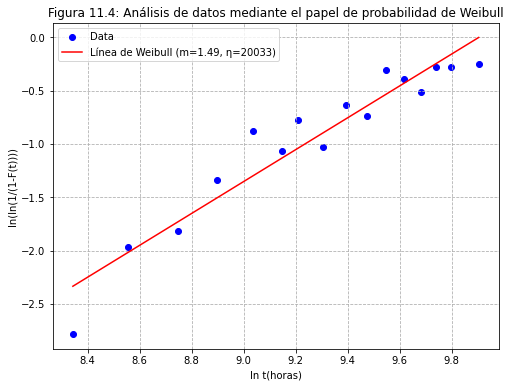

Parámetro de forma estimado m = 1.49
Parámetro de escala estimado η = 20033
t = Fiabilidad R(t) en 3000: 0.943


In [179]:
from scipy.stats import linregress
import matplotlib.ticker as ticker

# Data
Time = df['Time']
F = df['F']

# Eje Y transformado a Weibull
Y = np.log(np.log(1 / (1 - F)))

# Eje X transformado a logaritmo
X = np.log(Time)

# Estimación de los parámetros de Weibull mediante regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

# Cálculo del parámetro de forma m y del parámetro de escala η
m = slope
eta = np.exp(-intercept / m)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, slope * X + intercept, color='red', label=f'Línea de Weibull (m={m:.2f}, η={eta:.0f})')


#
plt.xlabel("ln t(horas)")
plt.ylabel("ln(ln(1/(1-F(t))))")
plt.title("Figura 11.4: Análisis de datos mediante el papel de probabilidad de Weibull")

#
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()

# Representacion del parámetro de forma m y η
print(f"Parámetro de forma estimado m = {m:.2f}")
print(f"Parámetro de escala estimado η = {eta:.0f}")

# Cálculo de la fiabilidad a t=3000
t = 3000
R_t = np.exp(- (t / eta) ** m)

#
print(f"t = Fiabilidad R(t) en {t}: {R_t:.3f}")


## 11.6

製品の寿命分布がワイブル分布に従い、平均寿命が１０００時間の場合のB10ライフを求める。ただし、ワイブル分布の形状パラメータ $ \beta $は１．５として計算する。
* $ \beta = 1.5 $ 劣化型の故障分布：使い続けるうちに徐々に故障しやすくなる特性をもっており、電子機器や家電製品に適用されることが多い。


La distribución de vida de un producto sigue una distribución de Weibull, y se requiere calcular la vida B10 cuando la vida promedio del producto es de 1000 horas, con el parámetro de forma $ \beta = 1.5 $
Dado que  $ \beta = 1.5 $ es un tipo de distribución de fallos por degradación: los productos tienden a volverse más propensos a fallar con el tiempo, un comportamiento común en equipos electrónicos y electrodomésticos.


La disponibilidad en un sistema de reparación se calcula como la relación entre el tiempo de funcionamiento del sistema (tiempo de actividad) y el tiempo total, cuando se divide en tiempo de actividad y tiempo de inactividad (tiempo de reparación).
* Métrica de durabilidad: MTBF (Tiempo Medio Entre Fallos)
* Métrica de mantenibilidad: MTTR (Tiempo Medio de Reparación)
* Disponibilidad = MTBF / (MTBF + MTTR)


In [180]:
from scipy.special import gamma

# Vida útil promedio objetivo
mean_lifetime = 1000  # Vida útil promedio (horas)

# Parámetro de forma (supuesto)
beta_param = 1.5

# Obtener el parámetro de escala  λ utilizando la fórmula de vida útil promedio
lambda_param = mean_lifetime / gamma(1 + 1 / beta_param)

#
print(f"Parámetro de forma β = {beta_param}")
print(f"Parámetro de escala λ = {lambda_param:.2f}")


Parámetro de forma β = 1.5
Parámetro de escala λ = 1107.73


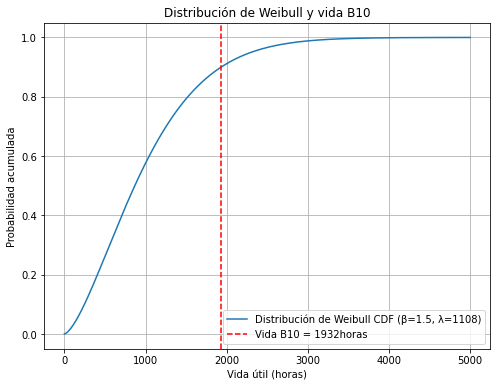

Vida B10 = 1931.58 horas


In [181]:
from scipy.stats import weibull_min

# Parámetros de la distribuchión de Weibull
lambda_param = lambda_param  # Parámetro de escala jerárquica
beta_param = beta_param  # Parámetro de forma

# Calcular la vida B10 utilizando la función de distribución acumulada (CDF)
# de la distribución de Weibull
B10 = lambda_param * (-np.log(0.1))**(1 / beta_param)

# Establecer el rango del eje de tiempo (de 0 a 5000 horas)
time = np.linspace(0, 5000, 500)

# Función de distribución acumulada（CDF）de la distribución de Weibull
cdf = weibull_min.cdf(time, beta_param, scale=lambda_param)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(time, cdf, label=f'Distribución de Weibull CDF (β={beta_param:.1f}, λ={lambda_param:.0f})')
plt.axvline(x=B10, color='r', linestyle='--', label=f'Vida B10 = {B10:.0f}horas')

# Etiquetas y títlo del gráfico
plt.title("Distribución de Weibull y vida B10")
plt.xlabel("Vida útil (horas)")
plt.ylabel("Probabilidad acumulada")
plt.legend()

#
plt.grid(True)
plt.show()

# Mostrar la vida B10
print(f"Vida B10 = {B10:.2f} horas")


## 2. Datos censurados a mitad de periodo

### (1) Datos censurados

Hasta ahora, hemos considerado el caso en el que todas las muestras fallan.
Sin embargo, en ocasiones, la prueba se detiene por razones como la duración del ensayo o la disponibilidad del equipo. Los datos obtenidos en ese momento se denominan **datos censurados**.

* Datos censurados a tiempo (Tipo I): Datos de una prueba que se detuvo en un tiempo predeterminado $ t_0 $.

* Datos censurados a número de fallos (Tipo II): Datos de una prueba que se detuvo en el momento del $ r $-ésimo fallo, contando desde el más temprano.

* Datos censurados aleatoriamente: Datos observados en los que los datos de muestras no fallidas se intercalan entre los datos de muestras fallidas, al ordenarlos de menor a mayor.

### (2) Análisis de Weibull de datos censurados.

* El análisis de Weibull para datos censurados por tiempo y datos censurados por número de fallos es básicamente el mismo que para los datos completos.
* El análisis de Weibull de datos censurados aleatoriamente se realiza utilizando el método del riesgo acumulado (método del riesgo acumulado de Nelson), que emplea un papel de riesgo acumulado de tipo Weibull.

  * $ H(t) = ln \frac{1}{1 - F(t)} $




## 11.7

ある部品についてサンプル数 $ n = 7 $で寿命試験を行った。その結果を表１１．２に示す。〇印は故障前に中途打ち切りしたデータでｘ印は故障を示す。以下の設問に答えよ。
1. 表１１．２のデータ打ち切りデータの区分は何かを答えよ。
2. Ｎｏ４の故障データ４５０００時間における累積ハザード関数$ H(t) $を求めよ。

Se realizó una prueba de vida útil en un determinado componente con un tamaño de muestra de $ n=7 $. Los resultados se muestran en la Tabla 11.2. El símbolo $ \bigcirc $ indica datos censurados antes de la falla, mientras que el símbolo $ \times $ indica fallas. Responda las siguientes preguntas:
1. ¿Cuál es la clasificación de los datos censurados en la Tabla 11.2?
2. Calcula la función de riesgo acumulada $ H(t) $ en $ t=45000 $ horas para el dato de falla del No.4.


In [182]:
# Data
data_dict = {
    "No": [1, 2, 3, 4, 5, 6, 7],
    "Data (Hora)": [25, 34, 38, 45, 51, 54, 68],
    "〇／✕": ['✕', '✕', '〇', '✕', '〇', '✕', '✕']
}

df = pd.DataFrame(data_dict)

print("Tabla 11.2: Resultados de la prueba de vida útil (unidad: x1000 horas) ")
print(df.to_string(index=False))

# ① Clasificación de los datos censuados
censored_types = "Los datos de 38 horas y 51 horas son censurados aleatoriamente (censura por la derecha）"

# ② Cálculo de la función de riesgo acumulada H(t) mediante el método de Nelson-Aalen
df_sorted = df.sort_values("Data (Hora)").reset_index(drop=True)

# Extraer solo los datos de fallos
failure_times = df_sorted[df_sorted["〇／✕"] == '✕']["Data (Hora)"].values

# Cálculo de H(t)
H_t_values = []
H_t = 0
n = len(df)  # Número inicial de sujetos de prueba

for i, t_i in enumerate(failure_times):
    r_i = n - i  # Número de suetos de prueba que sobreviven en el tiempo t_i
    H_t += 1 / r_i
    H_t_values.append((t_i, H_t))

# H(t) en el tiempo de 45,000 horas para el No.4
H_45000 = next(H for t, H in H_t_values if t == 45)

'''
# Cálculo de la función de riesto acumulada H(t)（método Kaplan-Meier）
failure_times = np.array([25, 34, 45, 54, 68])  # Solo datos de fallos
n = len(df)  # Tamaño de la muestra 7
H_t = sum(1 / (n - i) for i in range(len(failure_times)) if failure_times[i] <= 45)
'''

#
print("\n【Respuesta】")
print(f"1. Clasificación de los datos censurados: ")
print(f"   {censored_types}")
print(f"2. Función de riesgo acumulada H(t) para el No.4（45,000 horas）: {H_45000:.3f}")


Tabla 11.2: Resultados de la prueba de vida útil (unidad: x1000 horas) 
 No  Data (Hora) 〇／✕
  1           25   ✕
  2           34   ✕
  3           38   〇
  4           45   ✕
  5           51   〇
  6           54   ✕
  7           68   ✕

【Respuesta】
1. Clasificación de los datos censurados: 
   Los datos de 38 horas y 51 horas son censurados aleatoriamente (censura por la derecha）
2. Función de riesgo acumulada H(t) para el No.4（45,000 horas）: 0.510


## 16.1

3つの要素からなる図16.1(a)のようなシステムがある。現在、各要素の信頼度は0.90であるが、各要素の信頼度を上げ16.1(b)のように改善したい。このとき、システムの信頼度を以前と同じにするためには、各要素の信頼度を少なくともいくら以上にしなければならないか。

Se tiene un sistema compuesto por tres elementos, como se muestra en la Figura 16.1(a). Actualmente, la fiabilidad de cada elemento es de 0.90, pero se desea mejorar el sistema como en la Figura 16.1(b). En este caso, para que la fiabilidad del sistema sea la misma que la original, ¿cuál debe ser la fiabilidad mínima de cada elemento?

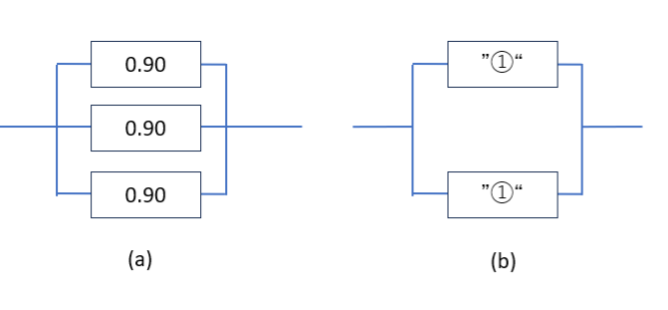

In [183]:
img = Image.open('Graph3/Fig_16_1.png')
display(img)

In [184]:
from scipy.optimize import fsolve

RA = 0.90

# 左辺を計算
lhs = 1 - (1 - RA)**3

# 解きたい関数：右辺 - 左辺 > 0 を満たすような RB を探す
def equation(rb):
    return (1 - (1 - rb)**2) - lhs

# 初期値を適当に設定（例えば0.5）
initial_guess = 0.5

# fsolveで方程式が0になる点を探す
rb_solution = fsolve(equation, initial_guess)[0]

print(f"Es necesario que R_B sea mayor o igual que  {rb_solution:.2f}")


Es necesario que R_B sea mayor o igual que  0.97


図１６．２に示す４つの構成要素をつないだ４種類のシステムがある。これらを信頼度の高い順に並べよ。

Considera los cuatro tipos de sistemas que se muestran en la Figura 16.2, cada uno compuesto por cuatro elementos. Ordénelos de mayor a menor fiabilidad.

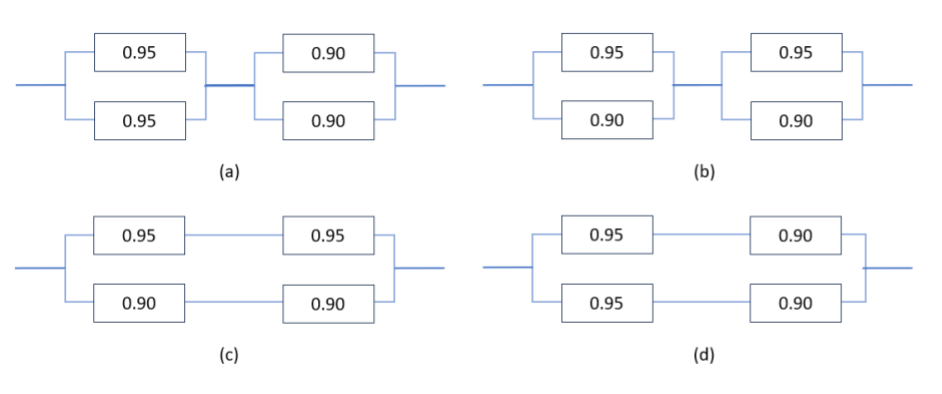

In [185]:
img = Image.open('Graph3/Fig16_2.png')
display(img)

In [186]:
# 値の計算
a = (1 - (1 - 0.95)**2) * (1 - (1 - 0.90)**2)
b = (1 - (1 - 0.95)*(1 - 0.90))**2
c = 1 - (1-0.95**2) * (1 - 0.90**2)
d = 1 - (1 - 0.95 * 0.90)**2

# 名前と値をタプルで保持
values = [('a', a), ('b', b), ('c', c), ('d', d)]

# 大きい順にソート
sorted_values = sorted(values, key=lambda x: x[1], reverse=True)

# 結果の表示
print("Ordenado de mayor a menor fiabilidad：")
for name, value in sorted_values:
    print(f"{name} = {value:.4f}")


Ordenado de mayor a menor fiabilidad：
b = 0.9900
a = 0.9875
c = 0.9815
d = 0.9790


## 16.2

1. ５個のアイテムの故障率が与えられているときのMTTFの推定値を求める

1. Estimar el valor de MTTF cuando se conocen las tasas de fallos de cinco artículos.

* Data:[120,150,300,310,320 (horas)

In [187]:
# Datos de tiempo de fallo
data = {'data': [120, 150, 300, 310, 320]}

# Cálculo de MTTF (Tiempo Medio hasta el Fallo)
failure_times = np.array(data['data'])
MTTF = np.mean(failure_times)

#
print(f"Valor estimado de MTTF: {MTTF} horas")


Valor estimado de MTTF: 240.0 horas


2. ある製品の寿命分布が母平均１０００時間、母標準偏差５０時間の正規分布に従うとき、この製品のB10ライフを求める。

2. Si la distribución de vida útil de un producto sigue una distribución normal con una media poblacional de 1000 horas y una desviación estándar poblacional de 50 horas, determina la vida B10 de este producto.

Vida B10: 936 horas


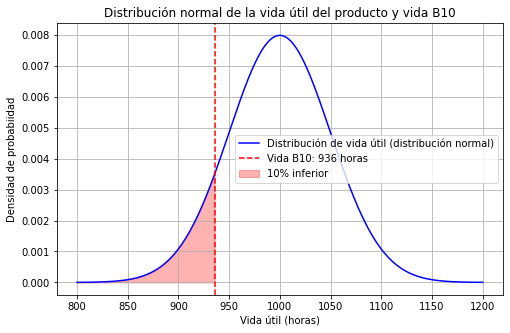

In [188]:
# Media poblacional y Desviación estándar poblacional
mu = 1000  # Media poblacional
sigma = 50  # Desviación estándar poblacional

# Cálculo de la vida B10 (percentil del 10% inferior)
b10_life = stats.norm.ppf(0.10, loc=mu, scale=sigma)
print(f"Vida B10: {b10_life:.0f} horas")

# Creación de un gráfico para la comprensión
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Distribución de vida útil (distribución normal)', color='blue')
plt.axvline(b10_life, color='red', linestyle='dashed', label=f'Vida B10: {b10_life:.0f} horas')
plt.fill_between(x, y, where=(x <= b10_life), color='red', alpha=0.3, label='10% inferior')
plt.xlabel('Vida útil (horas)')
plt.ylabel('Densidad de probabiidad')
plt.title('Distribución normal de la vida útil del producto y vida B10')
plt.legend()
plt.grid()
plt.show()

3. ある工場のラインは、24時間の連続運転を実施し、故障が発生した場合は修理を行う。最近の平均故障率は０．１（回/日）で、一回の故障の修理に要する時間の平均は２．０（時間）である。このラインのMTBF、平均アベラビリティを求めよ。

3. Una línea de producción en una fábrica opera de manera continua durante 24 horas. Cuando ocurre una falla, se realiza una reparación. La tasa de fallas promedio reciente es de 0.1 (fallas/día), y el tiémpo promedio requerido para reparar una falla es de 2.0 horas. Calcule el MTBF (Tiempo Medio Entre Fallas) y la Disponibilidad Promedio de esta línea.


In [189]:
# Tasa de fallas (fallas/día)
failure_rate = 0.1  # λ（lambda）

# Tiempo medio de reparación (horas)
mttr = 2.0  # Mean Time To Repair

# Cálculo del MTBF
mtbf = 1 / failure_rate  # Mean Time Between Failures

# MTBF (Tiempo Medio Entre Fallas)
availability = mtbf / (mtbf + mttr)

#
print(f"MTBF: {mtbf:.2f} horas")
print(f"Disponibilidad promedio: {availability:.3f}")


MTBF: 10.00 horas
Disponibilidad promedio: 0.833


4. ３の工場では、平均アベラビリティの向上に取り組んでいる。下記の対策の中で平均アベラビリティの向上に最も効果があるのはどれか。
* 一回の故障の修理に要する時間の平均はそのままで、平均故障率を０．０８（回/日）にする。
* 平均故障率はそのままで、一回の修理にようする時間の平均を１．０（時間）する。
* 平均故障率を０．０９（回/日）にし、一回の修理に要する時間の平均を１．５時間にする。

4. En la fábrica 3, están trabajando en la mejora de la disponibilidad promedio. ¿Cuál de las siguientes medidas es la más efectiva para mejorar la disponibilidad promedio?
* Mantener el tiempo medio de reparación por falla y reducir la tasa de fallas promedio a 0.08 fallas/día.
* Mantener la tasa de fallas promedio y reducir el tiempo de reparación por falla a 1.0 horas.
* Reducir la tasa de fallas promedio a 0.09 fallas/día y reducir el tiempo promedio de reparación por falla a 1.5 horas.

In [190]:
# Datos de cada medida
measures = {
    "Medida 1": {"failure_rate": 0.08, "mttr": 2.0},  # Reducir la tasa de fallas a 0.08
    "Medida 2": {"failure_rate": 0.1, "mttr": 1.0},   # Reducir el tiempo de reparación a 1. hora
    "Medida 3": {"failure_rate": 0.09, "mttr": 1.5},  # Reducir la tasa de fallas a 0.09 y
                                                      # el tiempo de reparación a 1.5
}

# Cálculo de la disponibilidad
availability_results = {}

for key, values in measures.items():
    failure_rate = values["failure_rate"]
    mttr = values["mttr"]

    mtbf = 1 / failure_rate  # Cálculo del MTBF
    availability = mtbf / (mtbf + mttr)  # Cálculo de la disponibilidad promedio

    availability_results[key] = availability

    # Salida de los resultados
    print(f"{key}: MTBF = {mtbf:.2f} horas, Disponibilidad promedio = {availability:.4f}")

# Selección de la mejor medida
best_measure = max(availability_results, key=availability_results.get)
print(f"\nLa medida más efectiva: {best_measure}")


Medida 1: MTBF = 12.50 horas, Disponibilidad promedio = 0.8621
Medida 2: MTBF = 10.00 horas, Disponibilidad promedio = 0.9091
Medida 3: MTBF = 11.11 horas, Disponibilidad promedio = 0.8811

La medida más efectiva: Medida 2


5. １０台の製品の寿命試験を行ったところ、下記の日数で故障した。１００日における信頼度を求めよ。

5. Se realizó una prueba de vida en 10 productos, y fallaron en los siguientes días, ¿Cuál es la confiabilidad a loa 100 días?

* [52, 65, 85, 95, 101, 115, 120, 150, 165, 170] días


In [191]:
# Datos de días de fallo
failure_days = [52, 65, 85, 95, 101, 115, 120, 150, 165, 170]

# Ordenar los datos en orden ascendente
failure_days_sorted = np.sort(failure_days)

# Calcular la confiabilidad para coada día de fallo
n = len(failure_days_sorted)  # Número de productos que fallaron
times = failure_days_sorted  # Días de fallo
failures = np.ones(n)  # Todos los eventos de fallo se cuantan como 1

# Usar el método de estimación de Kaplan-Meier
df = pd.DataFrame({'time': times, 'failure': failures})

# Calcular la función de superviviencia en cada punto en el tiempo
df['risk_set'] = np.arange(n, 0, -1)  # Conjunto de riesgo en cada punto el tiempo
df['survival_prob'] = 1 - df['failure'] / df['risk_set']  # Probabilidad de superviviencia
df['survival_function'] = df['survival_prob'].cumprod()  # Producto de las funciones de supervivencia

# Calcular la confiabilidad en el día 100
time_100 = 100
survival_at_100 = df[df['time'] >= time_100]['survival_function'].iloc[0]

# 結果を表示
print(f"Mostrar el resultado dela confiabilidad en el día 100: {survival_at_100*100:.0f}%")


Mostrar el resultado dela confiabilidad en el día 100: 50%


## 16.3

1. ８個のアイテムを２４０時間測定したところ、このうち４個が以下の時間で故障した。この時のMTBFの推定値、信頼区間を求めよ。ただし寿命分布は指数分布に従うものとする。

1. Se midieron 8 elementos durante 240 horas, de los cuales 4 fallaron en los siguientes tiempos. Se debe calcular la estimación de la MTBF y el intervalo de confianza, asumiendo que la distribución de la vida sigue una distribución exponencial.

* [150, 160, 200, 220] horas

In [192]:
# Tiempo de fallo
fallos = [150, 160, 200, 220]

# Tiempo total de prueba de los productos censurados（4 artículos × 240 horas）
tiempo_corte = 240 * 4

# Tiempo total de prueba T
# = Suma de los tiemos de fallo + Tiempo de prueba de los productos censurados
tiempo_total = sum(fallos) + tiempo_corte

# Número de fallos (r=
r = len(fallos)

# Estimación puntual de MTBF
mtbf = tiempo_total / r

# Cálculo del intervalo de confianza
# Nivel de significaansía alpha = 0.05
alpha = 0.05

# Grados de libertad
df = 2 * r

# Punto percentil de la distribución chi-cuadrada
chi2_lower = stats.chi2.ppf(1 - alpha / 2, df)
chi2_upper = stats.chi2.ppf(alpha / 2, df)

# Cálculo del intervalo de confianza
lower_bound = 2 * tiempo_total / chi2_lower
upper_bound = 2 * tiempo_total / chi2_upper

# Mostrar resultados
print(f"MTBF estimado: {mtbf:.1f} horas")
print(f"Intervalo de confianza: ({lower_bound:.1f}, {upper_bound:.1f}) horas")


MTBF estimado: 422.5 horas
Intervalo de confianza: (192.8, 1550.7) horas


2. 8個のアイテムを４個故障するまで測定したところ、故障時間が以下のように観測された。この時のMTBFの点推定、信頼区間を求めよ。ただし、寿命分布は指数分布にしたがうものとする。

2. Se realizaron pruebas de vida en 8 artículos hasta que fallaron 4 de ellos. Los tiempo de fallo observados son los siguientes. Calcule la estimación puntual del MTBF y el intervalo de confianza. Suponiendo que la distribución de vida sigue una distribución exponencial.
* [150, 160, 200, 220] horas

In [193]:
# Tiempo de fallo
fallos = [150, 160, 200, 220]

# Tiempo de prueba de los productos censurados（4 artículos × 220 horas）
tiempo_corte = 220 * 4

# Tiempo total de prueba T
# = Suma de los tiempos de fallo + Tiempo de prueba de los productos centurados
tiempo_total = sum(fallos) + tiempo_corte

# Número de fallos (r=
r = len(fallos)

# Estimación puntual de MTBF
mtbf = tiempo_total / r

# Cálculo del intevalo de confianza
# Nivel de significancia alpha = 0.05
alpha = 0.05

# Grados de libertad
df = 2 * r

# Punto percentil de la distribución chi-cuadrada
chi2_lower = stats.chi2.ppf(1 - alpha / 2, df)
chi2_upper = stats.chi2.ppf(alpha / 2, df)

# Cálculo del intervalo de confianza
lower_bound = 2 * tiempo_total / chi2_lower
upper_bound = 2 * tiempo_total / chi2_upper

# Mostrar resultados
print(f"MTBF estimado: {mtbf:.1f} horas")
print(f"Intervalo de confianza: ({lower_bound:.1f}, {upper_bound:.1f}) horas")


MTBF estimado: 402.5 horas
Intervalo de confianza: (183.6, 1477.2) horas


In [194]:
import re
from IPython.display import display
from PIL import Image
import gdown

def get_file_id(url,out):
    # 正規表現でファイルIDを抽出
    match = re.search(r'/d/([a-zA-Z0-9_-]+)', url)

    if match:
        file_id = match.group(1)
        print("ファイルID:", file_id)
    else:
        print("ファイルIDが見つかりませんでした。")

    url = f"https://drive.google.com/uc?id={file_id}"

    output = out

    gdown.download(url, output, quiet=False)

    img = Image.open(out)
    display(img)


ファイルID: 1UA6RTUM_auXOPxphiJlmE_VWStIpKmHT


Downloading...
From: https://drive.google.com/uc?id=1UA6RTUM_auXOPxphiJlmE_VWStIpKmHT
To: /Users/takanohiroshi/Library/CloudStorage/OneDrive-個人用/Documenten/Python/QCKentei/Graph3/Fig_16_1.png
100%|██████████| 15.9k/15.9k [00:00<00:00, 3.54MB/s]


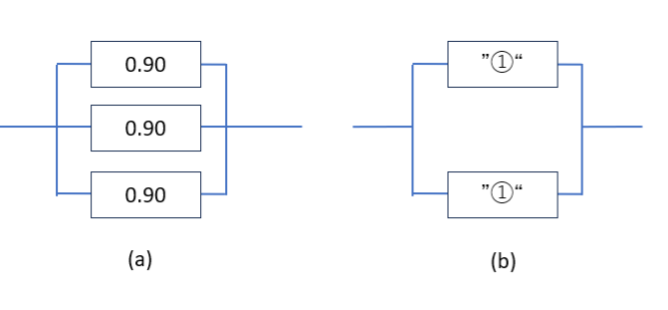

In [195]:
# 対象のURL
url = 'https://drive.google.com/file/d/1UA6RTUM_auXOPxphiJlmE_VWStIpKmHT/view?usp=drive_link'
out = "./Graph3/Fig_16_1.png"

get_file_id(url,out)

ファイルID: 1hUt5OUkcIvCw2vWzD_JJzokzLBbhySJe


Downloading...
From: https://drive.google.com/uc?id=1hUt5OUkcIvCw2vWzD_JJzokzLBbhySJe
To: /Users/takanohiroshi/Library/CloudStorage/OneDrive-個人用/Documenten/Python/QCKentei/Graph3/Fig16_2.png
100%|██████████| 32.6k/32.6k [00:00<00:00, 3.55MB/s]


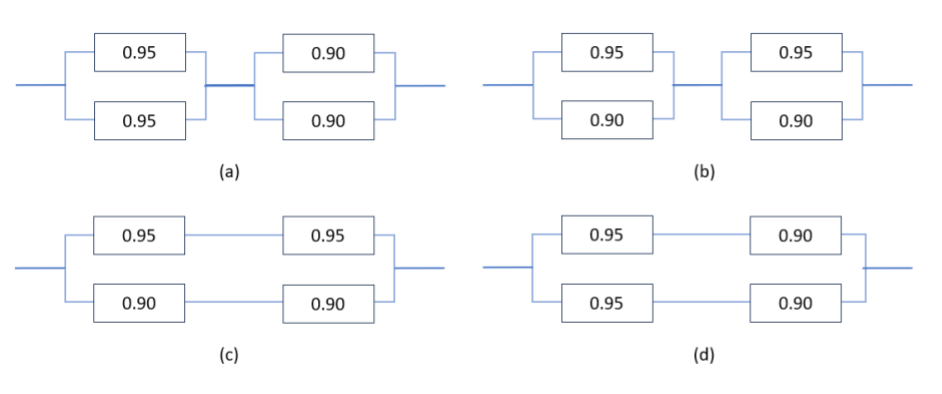

In [196]:
# 対象のURL
url = 'https://drive.google.com/file/d/1hUt5OUkcIvCw2vWzD_JJzokzLBbhySJe/view?usp=drive_link'
out = "./Graph3/Fig16_2.png"

get_file_id(url,out)

In [197]:
notebook_name = 'QCKentei1-11.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")

!jupyter nbconvert --to html {notebook_name}

[NbConvertApp] Converting notebook QCKentei1-11.ipynb to html
[NbConvertApp] Writing 980366 bytes to QCKentei1-11.html
